In [1]:
import numpy as np
from batchcreator import DataGenerator, undo_prep, load_fns_pysteps
from model_builder import GAN
import tensorflow as tf
from validation import Evaluator
from tqdm import tqdm
import matplotlib.pyplot as plt
import pysteps

from mpl_toolkits.axes_grid1 import ImageGrid
import config
from tqdm import tqdm

Pysteps configuration file found at: /usr/people/schreurs/.local/lib/python3.9/site-packages/pysteps/pystepsrc



In [3]:
val_row

array([list(['202001030505', '202001030510', '202001030515', '202001030520', '202001030525', '202001030530']),
       list(['202001030600', '202001030630', '202001030700'])],
      dtype=object)

In [10]:
R, R_target, metadata, metadata_target = load_fns_pysteps(val_row)
R.shape

(6, 765, 700)

In [78]:
import h5py
def load_h5(timestamp):
    year=timestamp[:4]
    m = timestamp[4:6]
    path_f = config.dir_rtcor + '/{}/{}/{}{}.h5'.format(year, m, config.prefix_rtcor, timestamp)
    with h5py.File(path_f, 'r') as f:
            rain = f['image1']['image_data'][:]
            # set masked values to 0
            rain[rain == 65535] = 0
            # Expand dimensions from (w,h) to (w,h,c=1)
            rain=rain/12
    return rain

In [64]:
val_row = [['201906052350'],['201906052350']]
R, R_target, metadata, metadata_target = load_fns_pysteps(val_row)

In [108]:
ls[:,0].shape

(6570,)

201906141105
201908191805


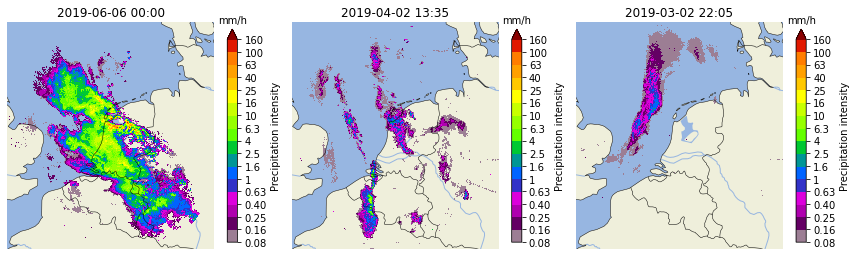

In [135]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
rdr = load_h5('201906060000')
pysteps.visualization.precipfields.plot_precip_field(rdr, geodata=metadata, colorbar=True)
plt.title('2019-06-06 00:00')
plt.subplot(1,3,2)
ls  = np.load('datasets/val2019_3y_30m.npy', allow_pickle = True)
ts = np.random.choice(ls[:,0])[0]
print(ts)
rdr = load_h5('201904021335')
pysteps.visualization.precipfields.plot_precip_field(rdr, geodata=metadata, colorbar=True)
plt.title('2019-04-02 13:35')
plt.tight_layout()
plt.subplot(1,3,3)
ls  = np.load('datasets/val2019_3y_30m.npy', allow_pickle = True)
ts = np.random.choice(ls[:,0])[0]
print(ts)
rdr = load_h5('201903022205')
pysteps.visualization.precipfields.plot_precip_field(rdr, geodata=metadata, colorbar=True)
plt.title('2019-03-02 22:05')
plt.tight_layout()
plt.savefig('figures/data_rtcor_examples', bbox_inches='tight')

<GeoAxesSubplot:>

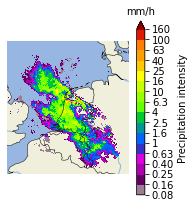

In [83]:
#
plt.subplot(1,2,1)
rdr = load_h5('201906060000')
pysteps.visualization.precipfields.plot_precip_field(rdr, geodata=metadata)
# plt.subplot(1,2,2)
# rdr = load_h5('201905060400')
# pysteps.visualization.precipfields.plot_precip_field(rdr, geodata=metadata)

In [2]:
val = np.load('datasets/test2020_3y_30m.npy', allow_pickle = True)

for val_row in val[:1]:
    R, R_target, metadata, metadata_target = load_fns_pysteps(val_row)

In [2]:
list_IDs = np.load('datasets/test2020_3y_30m.npy', allow_pickle = True)

0it [00:00, ?it/s]

0 202002241430 8132


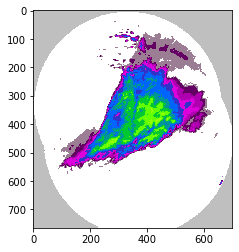

121it [00:19,  5.81it/s]

121 202002281700 11010


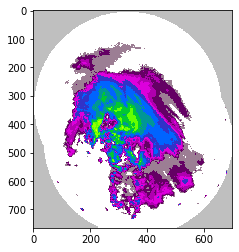

122it [00:20,  4.75it/s]

122 202002281730 12052


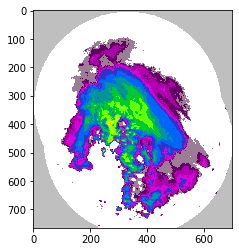

1058it [02:45,  5.88it/s]

1058 202006050830 15369


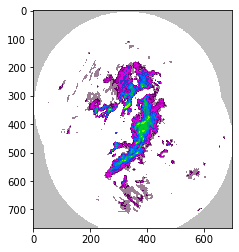

1059it [02:46,  5.03it/s]

1059 202006050900 25800


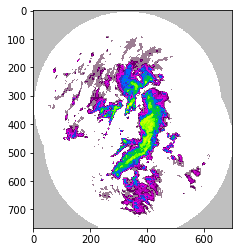

1060it [02:46,  4.75it/s]

1060 202006050930 28653


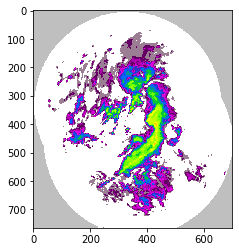

5324it [13:37,  6.51it/s]


In [290]:
mx = 1000
for i, sample in tqdm(enumerate(list_IDs[1000:])):
    R, R_target, metadata, metadata_target = load_fns_pysteps(sample)   
    
    r = np.sum(R_target > 5) 
    if r > mx:
        mx = r
        print(i, sample[0][-1], np.sum(R_target > 5))
        plt.imshow(R_target[0], cmap = cmap, norm = norm)
        plt.show()

In [76]:
juni27 = list_IDs[2574:2598]
print(juni27[0])
print()
print(juni27[-1])

[list(['202006262335', '202006262340', '202006262345', '202006262350', '202006262355', '202006270000'])
 list(['202006270030', '202006270100', '202006270130'])]

[list(['202006271805', '202006271810', '202006271815', '202006271820', '202006271825', '202006271830'])
 list(['202006271900', '202006271930', '202006272000'])]


In [234]:
aug16 = list_IDs[3656:3684]
print(aug16[0])
print()
print(aug16[-1])

[list(['202008202205', '202008202210', '202008202215', '202008202220', '202008202225', '202008202230'])
 list(['202008202300', '202008202330', '202008210000'])]

[list(['202008212305', '202008212310', '202008212315', '202008212320', '202008212325', '202008212330'])
 list(['202008220000', '202008220030', '202008220100'])]


0 202008202230 5446


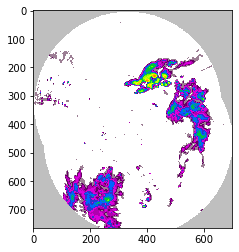

1 202008210000 3798


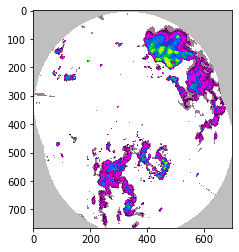

2 202008210030 3158


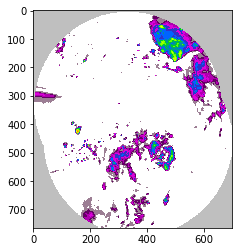

3 202008210100 2911


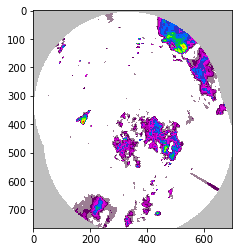

4 202008210200 6881


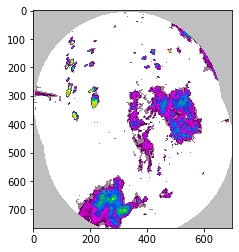

5 202008210500 3063


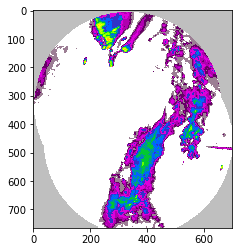

6 202008210600 610


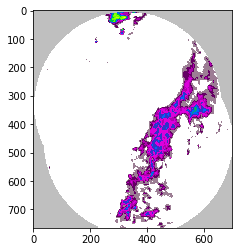

7 202008210630 411


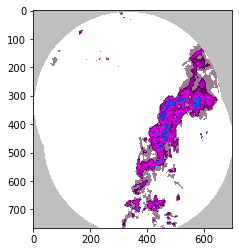

8 202008210700 617


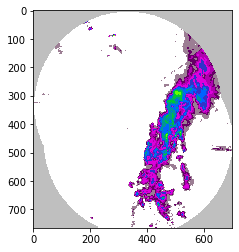

9 202008210730 686


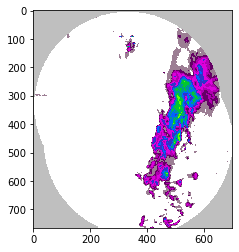

10 202008210800 440


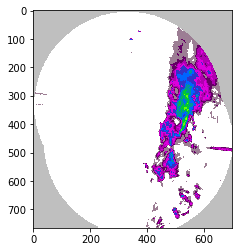

11 202008210830 231


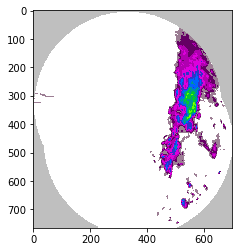

12 202008210900 50


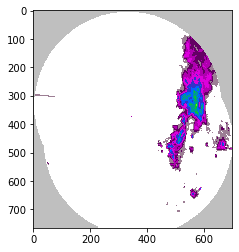

13 202008210930 35


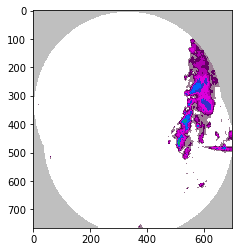

14 202008211000 35


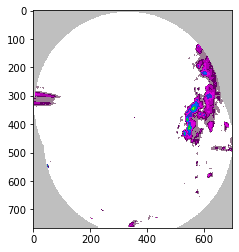

15 202008211030 8


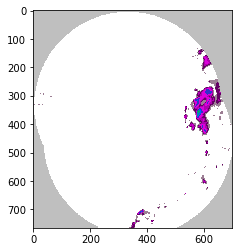

16 202008211100 8


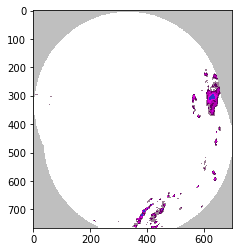

17 202008211330 754


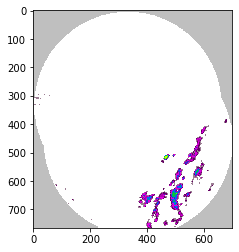

18 202008211400 1049


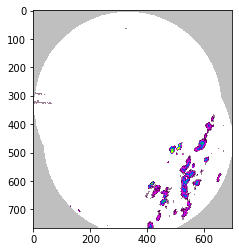

19 202008211430 1285


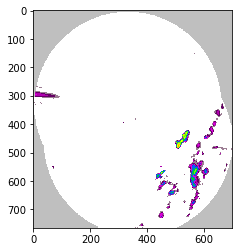

20 202008211500 1291


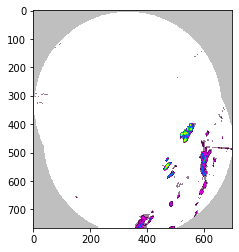

21 202008211530 1179


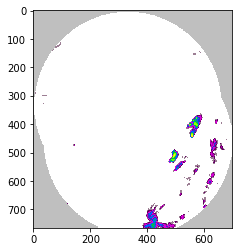

22 202008211600 1061


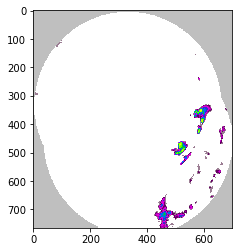

23 202008211630 717


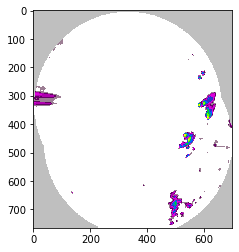

24 202008211700 460


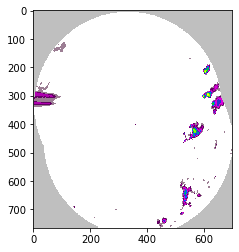

25 202008211730 216


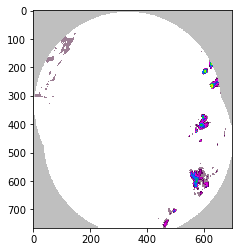

26 202008211800 53


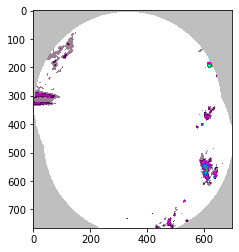

27 202008212330 0


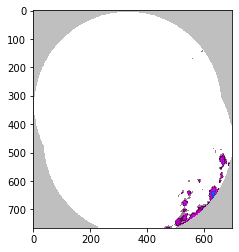

In [235]:
for i, sample in enumerate(aug16):
    R, R_target, metadata, metadata_target = load_fns_pysteps(sample)    
    print(i, sample[0][-1], np.sum(R_target > 5))
    plt.imshow(R_target[0], cmap = cmap, norm = norm)
    plt.show()

In [232]:
juni27 = [['202006271505', '202006271510', '202006271515', '202006271520', '202006271525', '202006271530'],
       ['202006271600', '202006271630', '202006271700']]

aug16 = [['202008162235', '202008162240', '202008162245', '202008162250', '202008162255', '202008162300'],
         ['202008162330', '202008170000', '202008170030']]

In [259]:
index

1000

In [ ]:
202006050930 

In [292]:
list_IDs[1060+1000][-1]

['202006051000', '202006051030', '202006051100']

index:  2059


<ipython-input-295-225b9d101b07>:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


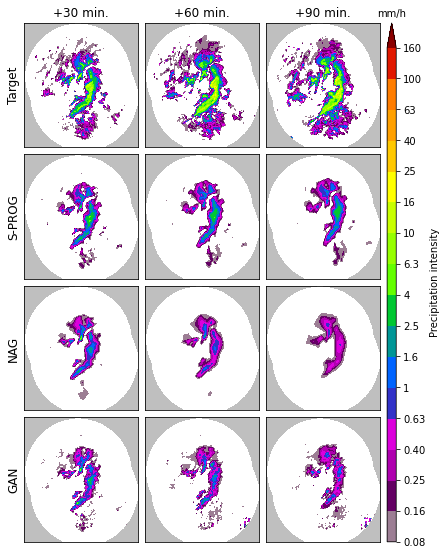

In [295]:
index = np.random.choice(len(list_IDs))
index=1059 +1000
print('index: ', index)
sample = list_IDs[index]
R, R_target, metadata, metadata_target = load_fns_pysteps(sample)

cmap, norm, _, _ = pysteps.visualization.precipfields.get_colormap('intensity', 'mm/h', 'pysteps')
fig = plt.figure(figsize=(6,8)) 
n=4
mask = get_mask_rtcor()
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(n,3),
                axes_pad=0.10,
                share_all=True,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="2%",
                cbar_pad=0.1
                )

leadtimes = [30,60,90]
for i in range(3):
    im = grid[i].imshow(R_target[i], cmap = cmap, norm = norm)
    
    fn_forecast = sample[1][i]+'_lt{}'.format(leadtimes[i])
    
    runname = 'SPROG_test/'
    R_forecast = np.load(config.dir_pred + runname + fn_forecast + '.npy')[i]
    R_forecast = np.nan_to_num(R_forecast)
    R_forecast[~mask] = np.nan
    im = grid[3+i].imshow(R_forecast, cmap = cmap, norm = norm)
    
    runname = 'model_quiet_yogurt_535_test/'
    R_forecast = np.load(config.dir_pred + runname + fn_forecast + '.npy')
    R_forecast = np.nan_to_num(R_forecast)
    R_forecast[~mask] = np.nan
    im = grid[2*3+i].imshow(R_forecast, cmap = cmap, norm = norm)
    
    runname = 'model_silver_field_559_test/'
    R_forecast = np.load(config.dir_pred + runname + fn_forecast + '.npy')
    R_forecast[~mask] = np.nan
    im = grid[3*3+i].imshow(R_forecast, cmap = cmap, norm = norm)
    
    for ind in [i,3+i, 2*3+i, 3*3+i]:
        grid[ind].set_yticklabels([])
        grid[ind].set_xticklabels([])
        grid[ind].set_yticks([])
        grid[ind].set_xticks([])
grid[0].set_ylabel('Target', fontsize=12)
grid[3].set_ylabel('S-PROG', fontsize=12)
grid[6].set_ylabel('NAG', fontsize=12)
grid[9].set_ylabel('GAN', fontsize=12)


grid[0].set_title('+30 min.')
grid[1].set_title('+60 min.')
grid[2].set_title('+90 min.')
pysteps_colorbar(im, cax=grid.cbar_axes[0])
plt.tight_layout()
#plt.savefig('figures/vis202002161930')

In [84]:
import config

runname = 'model_silver_field_559_test/'
for (_, ys_target), (_, ys_timestamps) in tqdm(zip(target_gen, list_IDs)):
    leadtimes = [30, 60, 90]
    for i, leadtime in enumerate(leadtimes):
        fn_forecast = ys_timestamps[i]+'_lt{}'.format(leadtime)
        R_forecast = np.load(config.dir_pred + runname + fn_forecast + '.npy')
        R_target = np.squeeze(ys_target[0][i])
        
        evaluator.verify(R_target, R_forecast, leadtime=leadtime)

NameError: name 'config' is not defined

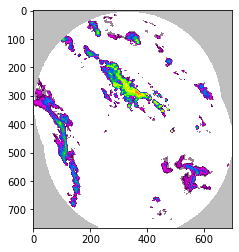

In [53]:
plt.imshow(R_target[-1], cmap = cmap, norm = norm)

In [28]:
def plot_target_pred(target, pred):
    data = [target, pred]
    vmax = np.max(data)

    
    n = target.shape[0]
    # Set up figure and image grid
    fig = plt.figure(figsize=(9,9)) 

    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                     nrows_ncols=(n,2),
                     axes_pad=0.10,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.1
                     )
    cmap, norm, _, _ = pysteps.visualization.precipfields.get_colormap('intensity', 'mm/h', 'pysteps')
    
    for i in range(n):
        im = grid[i*2].plt.imshow(R[-1], cmap = cmap, norm = norm)
        grid[i*2].axis('off')
    grid[0].set_title('y')
    for i in range(n):
        im = grid[1+2*i].imshow(np.squeeze(data[1][i]), cmap = cmap, norm = norm)
        grid[1+2*i].axis('off') 
    grid[1].set_title('y_pred')
    # Colorbar
    pysteps_colorbar(im, cax=grid.cbar_axes[0])
    #grid[1].cax.toggle_label(True)

    #plt.tight_layout(rect=(0,0,1,1))    # Works, but may still require rect paramater to keep colorbar labels visible
    return fig

def pysteps_colorbar(im, cax=None):
    ptype='intensity'
    units='mm/h'
    colorscale='pysteps'
    extend = "max"
    
    # get colormap and color levels
    _, _, clevs, clevs_str = pysteps.visualization.precipfields.get_colormap(ptype, units, colorscale)

    cbar = plt.colorbar(
            im, ticks=clevs, spacing="uniform", extend=extend, shrink=0.8, cax=cax
        )
    if clevs_str is not None:
        cbar.ax.set_yticklabels(clevs_str)

    if ptype == "intensity":
        cbar.ax.set_title(units, fontsize=10)
        cbar.set_label("Precipitation intensity")